In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_excel('Flight_Train.xlsx')
pd.set_option('display.max_columns', None)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train.dropna(inplace=True)

In [8]:
df_train['Date_of_Day'] = pd.to_datetime(df_train['Date_of_Journey'],format="%d/%m/%Y").dt.day
df_train['Date_of_Month'] = pd.to_datetime(df_train['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [9]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
df_train.duplicated().sum()

220

In [11]:
df_train.drop_duplicates(inplace=True)

In [12]:
df_train['Dep_Hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_Min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [13]:
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
df_train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [15]:
df_train['Arrival_Hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_Minute'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [16]:
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [17]:
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [18]:
duration = list(df_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_min = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))

In [19]:
df_train['Duration_Hours'] = duration_hours
df_train['Duration_Min'] = duration_min
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [20]:
df_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
df_train['Total_Stops'].replace({'non-stop' :0,'1 stop' :1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [22]:
df_train['Airline']= df_train[(df_train.Airline != 'Trujet') & (df_train.Airline != 'Vistara Premium economy') 
         & (df_train.Airline != 'Jet Airways Business')]

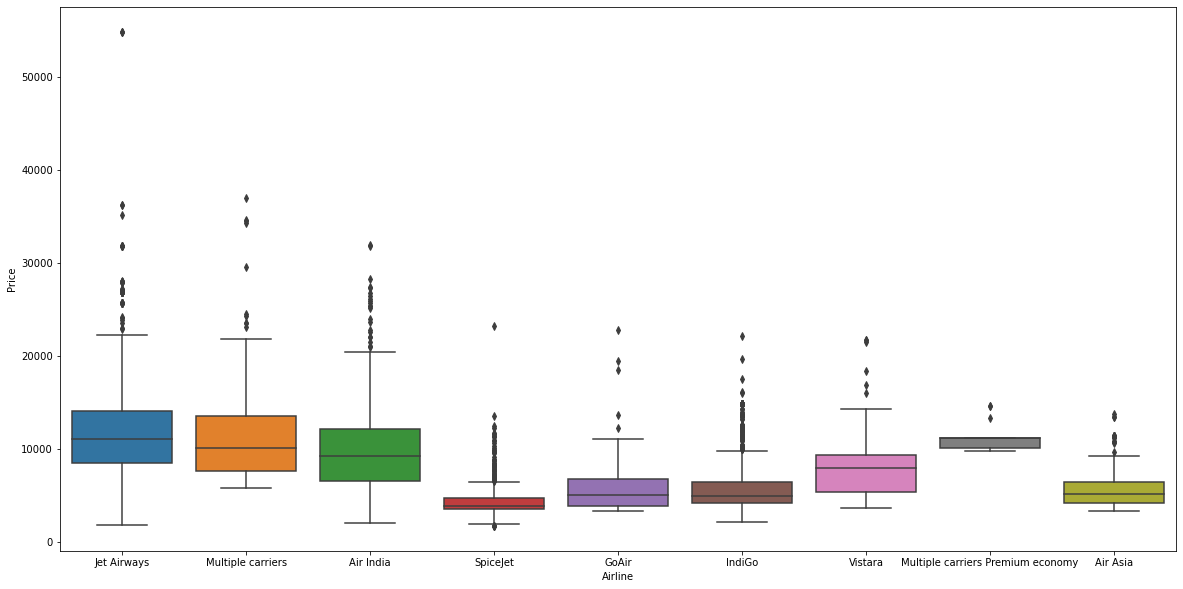

In [23]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
plt.figure(figsize=(20,10))
sns.boxplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False))
plt.show()

In [24]:
airline = pd.get_dummies(df_train['Airline'],drop_first=True)

In [25]:
df_train.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [26]:
source = pd.get_dummies(df_train['Source'],drop_first=True)

In [27]:
df_train.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
destination = pd.get_dummies(df_train['Destination'],drop_first=True)

In [29]:
df_train = pd.concat([df_train,source,destination,airline],axis=1)
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [30]:
df_train.drop(['Airline','Source','Destination','Route','Duration','Additional_Info'],axis=1 ,inplace=True)

In [31]:
df_train.rename({'Arrival_Minute':'Arrival_Min'},axis=1,inplace=True)

In [32]:
df_train

,Total_Stops,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#  Handling Test Data

In [34]:
df_test = pd.read_excel('Flight_Test.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [36]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [37]:
df_test.duplicated().sum()

26

In [38]:
df_test.drop_duplicates(inplace=True)

In [39]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [40]:
duration = list(df_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_min = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))

In [41]:
df_test['Duration_Hours'] = duration_hours
df_test['Duration_Min'] = duration_min

In [42]:
df_test.drop(['Duration'],axis=1,inplace=True)

In [43]:
df_test['Date_of_Day'] = pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.day
df_test['Date_of_Month'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.month
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [44]:
df_test['Dep_Hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_Min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

In [45]:
df_test.drop(['Dep_Time'],axis=1,inplace=True)

In [46]:
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [47]:
df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [48]:
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_Hours,Duration_Min,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,10,55,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,4,0,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,23,45,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,13,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2,50,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,23,55,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,2,35,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,35,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15,15,6,3,4,0,19,15


In [49]:
df_test.Total_Stops.value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [50]:
df_test.Total_Stops.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [51]:
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_Hours,Duration_Min,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,10,55,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,4,0,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,23,45,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,13,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,2,50,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,No info,23,55,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,No info,2,35,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,35,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,No info,15,15,6,3,4,0,19,15


In [52]:
df_test.Airline.value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [53]:
df_test['Airline'] = df_test[(df_test['Airline'] != 'Jet Airways Business') & (df_test['Airline'] != 'Vistara Premium economy')
                            & (df_test['Airline'] != 'Multiple carriers Premium economy')]

In [54]:
airline = pd.get_dummies(df_test['Airline'], drop_first=True)

In [55]:
df_test.Source.value_counts()

Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [56]:
source = pd.get_dummies(df_test['Source'],drop_first=True)

In [57]:
df_test.Destination.value_counts()

Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [58]:
destination = pd.get_dummies(df_test['Destination'], drop_first=True)

In [59]:
df_test = pd.concat([df_test,airline,source,destination], axis=1)

In [60]:
df_test.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

In [61]:
df_test

,Total_Stops,Duration_Hours,Duration_Min,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,10,55,6,6,17,30,4,25,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,1,4,0,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,23,45,21,5,19,15,19,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,1,13,0,21,5,8,0,21,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0,2,50,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,23,55,6,6,20,30,20,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,2,35,27,3,14,20,16,55,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,35,6,3,21,50,4,25,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,15,15,6,3,4,0,19,15,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Feature Engineering

In [62]:
df_train

,Total_Stops,Price,Date_of_Day,Date_of_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [63]:
X = df_train.drop(['Price'],axis=1)
y = df_train['Price']

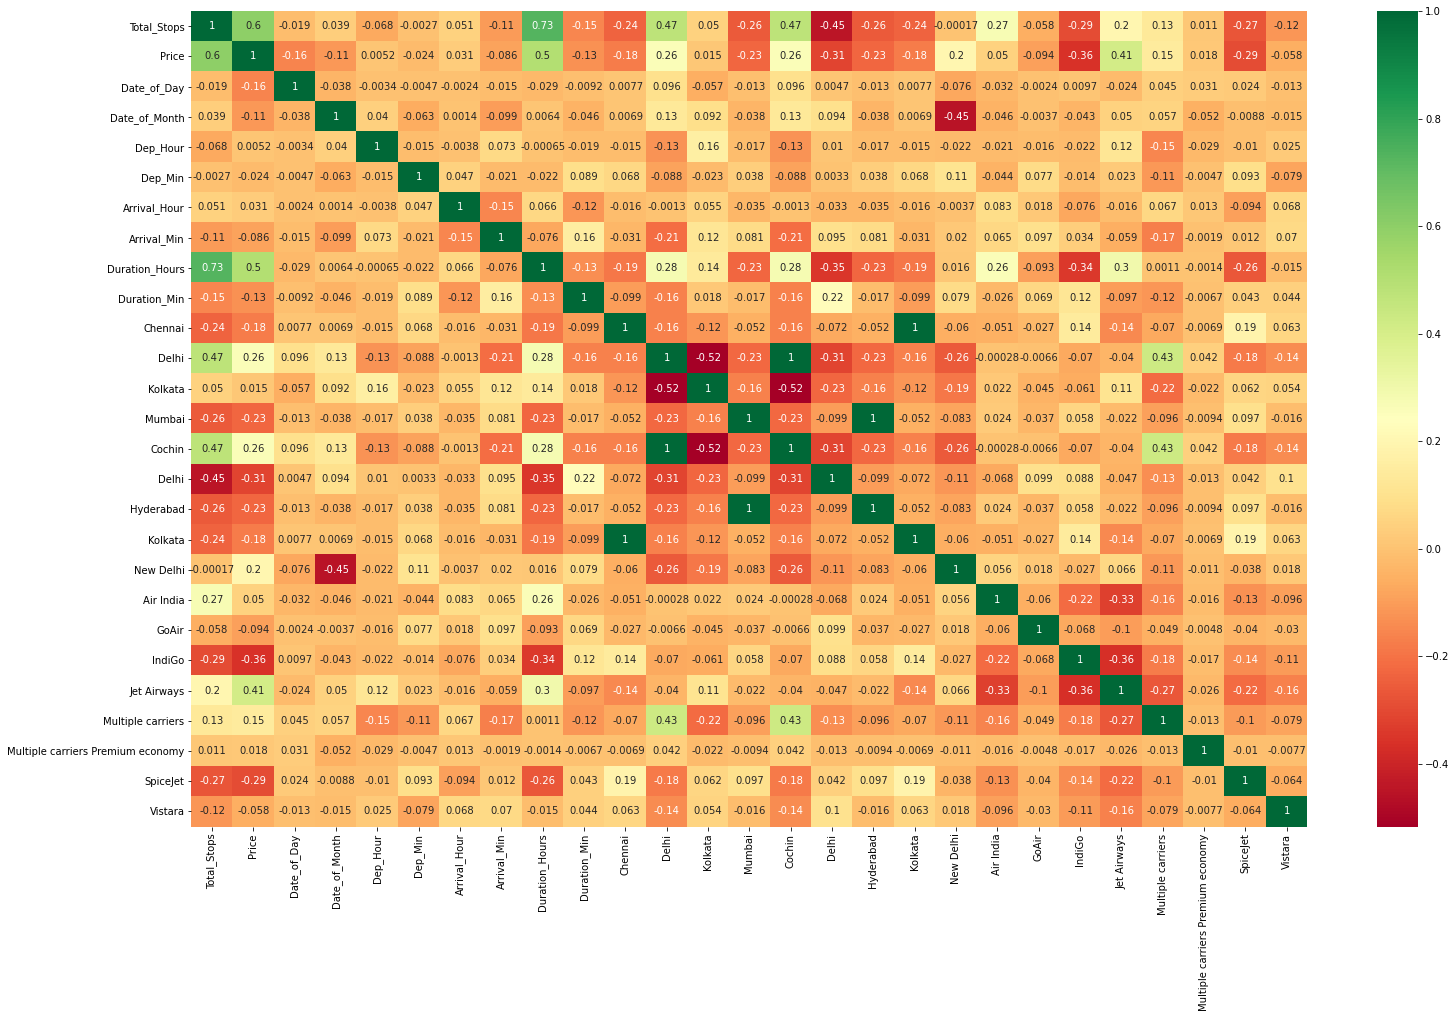

In [64]:
plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

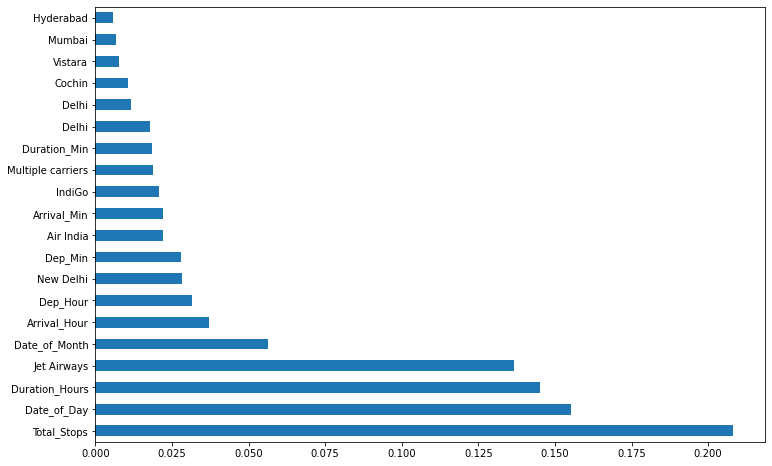

In [66]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [72]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)
Ridge.score(X_train,y_train).round(2)

0.56

In [73]:
Ridge.score(X_test, y_test).round(2)

0.59

In [74]:
y_pred = Ridge.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
mae = mean_absolute_error(y_test,y_pred).round(2)
r2 = r2_score(y_test,y_pred).round(2)
mape = mean_absolute_percentage_error(y_test,y_pred).round(2)
print('MAE = ',mae)
print('R2 = ',r2)
print('MAPE',mape)

MAE =  2021.13
R2 =  0.59
MAPE 0.25


In [77]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=1.5, fit_intercept=True, normalize=False, precompute=False, max_iter=10,
              tol=0.001, selection='cyclic')
Lasso.fit(X_train, y_train)
Lasso.score(X_train, y_train).round(2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35283118842.66871, tolerance: 179631972.18634343
  model = cd_fast.enet_coordinate_descent(


0.56

In [78]:
Lasso.score(X_test, y_test).round(2)

0.58

In [79]:
y_pred = Lasso.predict(X_test)

In [80]:
mae = mean_absolute_error(y_test,y_pred).round(2)
r2 = r2_score(y_test,y_pred).round(2)
mape = mean_absolute_percentage_error(y_test,y_pred).round(2)
print('MAE = ',mae)
print('R2 = ',r2)
print('MAPE',mape)

MAE =  2036.47
R2 =  0.58
MAPE 0.25


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,criterion='mae',min_samples_split=3,max_depth=9)
gbr.fit(X_train,y_train)
gbr.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


In [102]:
gbr.score(X_test,y_test)

0.7593514358320294

In [70]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
reg.score(X_train,y_train)

0.9507106279320497

In [66]:
reg.score(X_test,y_test)

0.7646129016698479

In [67]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

criterion=['mse','mae']

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

min_samples_split= [2,5,10,50,100]

min_samples_leaf= [1,2,5,10]

In [68]:
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
best_param = RandomizedSearchCV(estimator=reg,param_distributions=random_grid,n_iter=10,cv=5)

In [70]:
best_param.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [74]:
best_param.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'mse'}

In [77]:
prediction = best_param.predict(X_test)
prediction

array([11062.23067387,  6813.20559472, 11899.41485032, ...,
       12426.97597835,  9695.1872354 , 12254.5191905 ])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


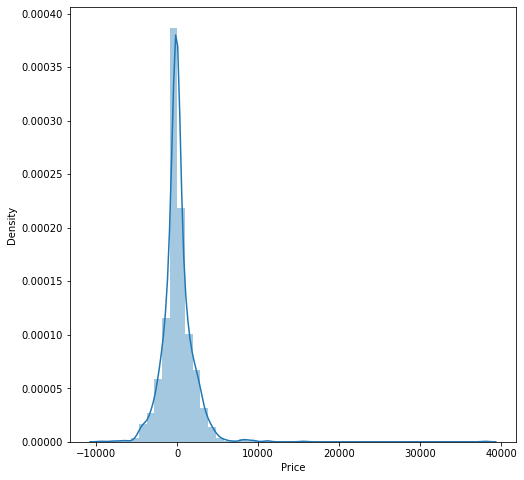

In [78]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

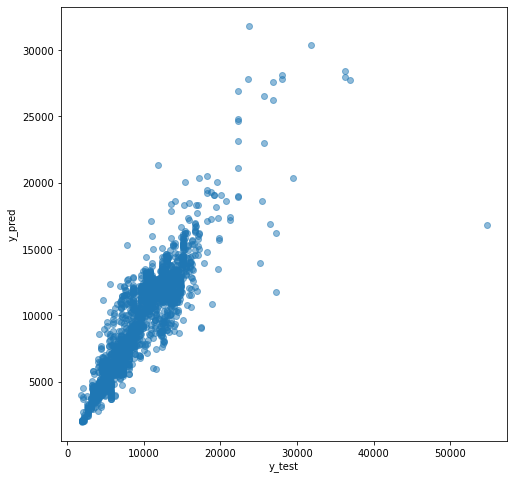

In [79]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1193.0747459921927
MSE: 3892604.0156426374
RMSE: 1972.9683260616825
